
# Dithering Telescope
In this notebook, one can set a sky position to look at (boresight position) and a source (with profile and position) and study the effect of possible telescope dithering on the signal-to-noise ratio (SNR).


In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import dithering


After the general packages and the special package "dithering" is imported, one start with setting the source and boresight positions. By default, "generate_source()" function generates a source like a QSO. For other types of sources, you can uncomment/comment the lines below.


### Constructing the object

One can uncomment/comment a source below to study

In [2]:
dit    = dithering.dithering()
# QSO
#source = dit.generate_source(disk_fraction=0., bulge_fraction=0.)
#source_type = 'qso'
# ELG
source = dit.generate_source(disk_fraction=1., bulge_fraction=0.)
source_type = 'elg'
# LRG
#source = dit.generate_source(disk_fraction=0., bulge_fraction=1.)
#source_type = 'lrg'
dit.set_source_position(20.*u.deg, 25.*u.deg)
dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
dit.set_focal_plane_position()

### Calculating SNR
Everything is internally done in the dithering package and the user only needs to run the simulation as shown below. "report" options prints out the SNR and the "plot" option plots the spectrum of the given source. For now, the source type (the first argument of the function) is not active, so it always runs for QSOs

In [3]:
dit.run_simulation(source_type, *source, report=True)

Current boresight position is: 20.000 deg , 24.500 deg
Current source position is: 20.000 deg , 25.000 deg
Current fiber position is: 0.470 mm , 0.001 mm
Current focal plane position is: 0.470 mm , 0.001 mm
A fiber placement offset of [0.0, 0.0] um is added to simuation
With the current configuration, SNR are:
-- camera b: 3.518 / 0.5 Angstrom
-- camera z: 2.048 / 0.5 Angstrom
-- camera r: 2.804 / 0.5 Angstrom


### Moving the telescope
This is where the <b>magic</b> happens. The fiber is positioned at the original focal plane coordinates. When one changes the boresight position, the package automatically calculates the new focal plane coordinates along with the fiber placement offset. This offset is used to move the fiber (in turn the aperture in the fiber acceptance calculations).
In the example below, the altitude boresight is changed by <b>0.05</b> degree. 

In [4]:
dit.change_alt_az_bore_position(20.*u.deg, 24.45*u.deg)
dit.run_simulation(source_type, *source, report=True)

Current boresight position is: 20.000 deg , 24.450 deg
Current source position is: 20.000 deg , 25.000 deg
Current fiber position is: 0.470 mm , 0.001 mm
Current focal plane position is: 0.517 mm , 0.001 mm
A fiber placement offset of [array([ 46.98265714]), array([ 0.14724416])] um is added to simuation
With the current configuration, SNR are:
-- camera b: 2.231 / 0.5 Angstrom
-- camera z: 1.301 / 0.5 Angstrom
-- camera r: 1.781 / 0.5 Angstrom


### Rotating the positioner along $\theta_2$

If the fiber aperture is not covering the source, we may have to move the fiber around a bit to find the maximum
The example below starts from -2 degrees and scans up to 2 degrees to find the maximum.

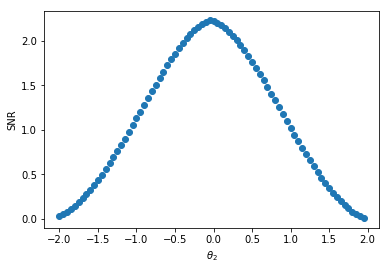

In [5]:
x = []
y = []
dit.rotate_positioner(-2*u.deg)
for i in range(80):
    dit.rotate_positioner(0.05*u.deg)
    dit.run_simulation(source_type, *source, report=False)
    x.append(-2+i*0.05)
    y.append(np.median(dit.SNR['b'][0]))
plt.plot(x, y, 'o')
plt.xlabel(r'$\theta_2$')
plt.ylabel('SNR')
plt.show()
# reverse the rotation to the original point
dit.rotate_positioner(-2*u.deg)


Now let's change the boresight again and observe the fiber rotation

In [6]:
dit.change_alt_az_bore_position(19.95*u.deg, 24.45*u.deg)
dit.run_simulation(source_type, *source, report=True)

Current boresight position is: 19.950 deg , 24.450 deg
Current source position is: 20.000 deg , 25.000 deg
Current fiber position is: 0.470 mm , 0.001 mm
Current focal plane position is: 0.517 mm , 0.051 mm
A fiber placement offset of [array([ 46.98265714]), array([ 50.14520332])] um is added to simuation
With the current configuration, SNR are:
-- camera b: 1.145 / 0.5 Angstrom
-- camera z: 0.657 / 0.5 Angstrom
-- camera r: 0.905 / 0.5 Angstrom


/home/tyapici/Projects/desi/code/specsim/specsim/simulator.py:552: RuntimeWarning: divide by zero encountered in true_divide
  source_flux_to_photons.T * camera.throughput)).T
/home/tyapici/Projects/desi/code/specsim/specsim/simulator.py:556: RuntimeWarning: invalid value encountered in multiply
  output['flux_calibration'] * output['num_source_electrons'])


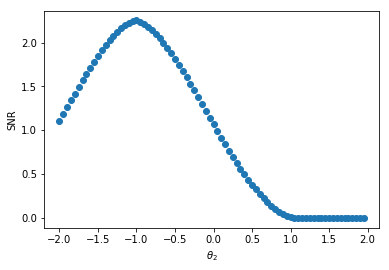

In [8]:
x = []
y = []
dit.rotate_positioner(-2*u.deg)
for i in range(80):
    dit.rotate_positioner(0.05*u.deg)
    dit.run_simulation(source_type, *source, report=False)
    x.append(-2+i*0.05)
    y.append(np.median(dit.SNR['b'][0]))
plt.plot(x, y, 'o')
plt.xlabel(r'$\theta_2$')
plt.ylabel('SNR')
plt.show()
# reverse the rotation to the original point
dit.rotate_positioner(-2*u.deg)